### 정규화

릴레이션과 기본키를 지정한 상태 $\to$ 더 효율적으로 관리할 수 있는 방법이 없을까?

> 릴레이션을 쪼개고, 조인으로 불러서 사용한다.

*왜 쪼개야 하는가?*

> 어떠한 속성의 값에 대하여, 특성이 중복되는 경우가 많음.

|||||
|-|-|-|-|
|1|3|A|9|
|1|5|A|9|
|2|8|B|10|
|4|9|B|10|

> 3, 4번째 열의 정보가 중복이 있음. 따라서 아래와 같이 만듦.

|||
|-|-|
|1|3|
|1|5|
|2|8|
|4|9|

|||
|-|-|
|A|9|
|B|10|

* 정규화 개념

데이터 중복으로 인해 발생하는 삽입/수정/삭제 연산에서의 부작용을 **이상현상**이라 한다. 이러한 이상현상을 제거하는 과정이 정규화이다.

|||
|-|-|
|삽입 이상|새 데이터 삽입으로 인하여 불필요한 데이터 삽입이 필요 > 한 줄만 삽입하면 되는 게 둘 다 넣어야 함.|
|갱신 이상|중복 튜플들 중 일부만 변경하여 불일치가 발생 > 한 줄만 바꾸면 될 줄 알았는데 둘 다 바꿔야 함.|
|삭제 이상|튜플 삭제 시 필요데이터가 같이 삭제됨 > 한 줄만 삭제하려고 했는데 해당 속성의 같은 값을 가지는 게 같이 삭제됨.|

> 전부 다 DB 관리 측면에서 잘 되도록 하는 과정임. 자동화된 프로그램이라도 상당한 리소스가 소모.

* 이상현상의 예 : 회원 개체에 대한 정보가 아래 릴레이션에서만 관리된다고 하자.

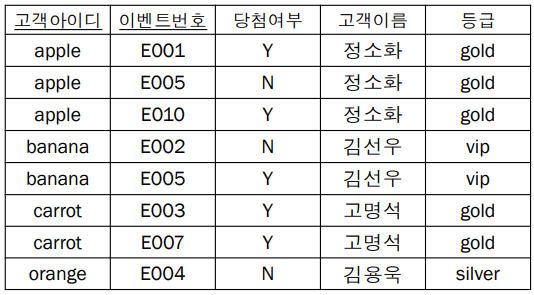

고객아이디와 이벤트번호가 조합이 되어야 기본키가 만들어짐.

> 고객아이디가 정해지면 고객이름과 등급은 뒤따라옴.

1. 삽입이상

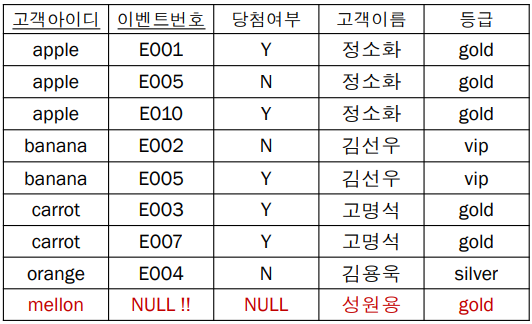

> NULL이 생길 수밖에 없는 구조

2. 갱신이상

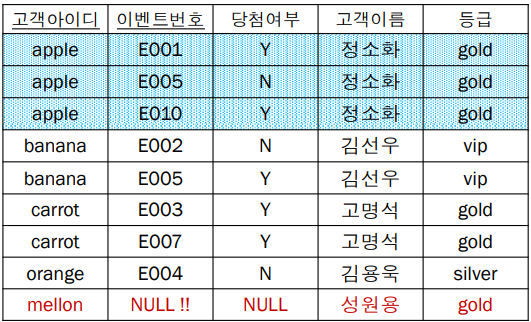

> 정소화의 등급을 VIP로 바꾸려고 하니, 세 튜플을 모두 수정해야 함.

3. 삭제이상

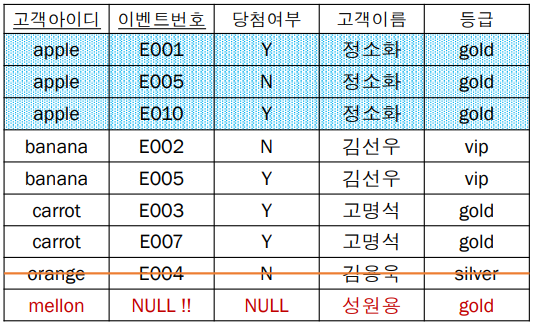

> 이벤트 참여 관련 정보를 삭제하는 과정에 회원 정보가 같이 삭제될 수 있음.

문제가 되는 속성은 계속 바뀔 수 있다. 새로 분리한 릴레이션에서 이상이 발생할 수 있음. $\to$ n 정규형

기본키와 관련된 속성들을 1차적으로 살펴보고, 이후 반복한다.

* 정규화의 필요성

관련성의 문제. 어떤 속성의 값이 정해지면 다른 속성의 값이 자동으로 정해지는 상황.

> 하나의 릴레이션에는 강한 연관성을 가진 것들을 모을 수 있도록 하는 과정.

* 함수 종속 : 연관성을 분석하기 위한 수학적 개념으로 함수 종속을 이용

X와 Y가 함수적으로 종속되어 있다는 말은 X값 하나에 Y의 값이 항상 하나만 대응됨을 의미. 그냥 함수적 관계.

> 등급이나 고객이름은 고객아이디에 함수적으로 종속되어 있음.
>
> 이름은 등급에 대해서 함수적으로 종속되지 않음. (등급은 여러 개의 이름을 가짐. 반대로 등급은 이름에 대해서 일단 함수적으로 종속되어 있긴 함.)
>
> (고객아이디, 이벤트번호)에 당첨여부는 함수적으로 종속되어 있음. (Primer key)
>
> 이벤트번호에 당첨여부는 함수적으로 종속되지 않음. (이벤트마다 당첨이 될수도, 안될수도 있음.)

* 함수종속의 표현법

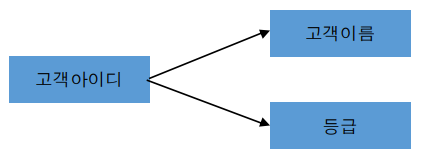

> 왼편의 속성이 기본키나 후보키가 될 수도 있으나, 아닐 수도 있음.

* 부분 종속과 완전 종속

고객아이디 $\to$ 고객이름 : 완전 종속. 더 분해가 되지 않는 종속

{고객아이디, 이벤트번호} $\to$ 고객이름 : 부분 종속. 전부 동원하지 않아도 종속이 유지됨.

{고객아이디, 이벤트번호} $\to$ 당첨여부 : 완전 종속. 전부 동원해야만 종속이 유지됨.

* 정규화 개념 및 종류

기본 정규형 : 제 1, 2, 3 정규형, 보이스/코드 정규형

고급 정규형 : 제 4, 5 정규형. 복잡하고 연산을 자주 하는 곳에서 사용.

`-` 제1정규형

> 릴레이션의 **속성 값들이 원자로만 구성**되어 있도록 변경. 사실상 아무것도 안한거임.

`-` 제2정규형

> 기본키가 아닌 모든 속성(y)이 기본키(x)에 **완전 함수 종속**
>
> 부분종속 관계를 해소하는 정규형.

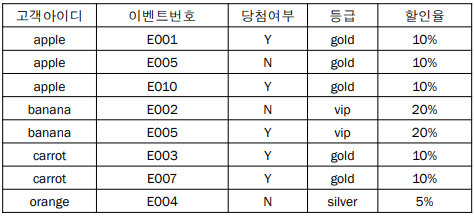

고객아이디 $\to$ 등급, 할인율 : 완전 종속.

{고객아이디, 이벤트번호} $\to$ 등급, 할인율, **당첨여부** : 기본키에 부분 종속 / 부분 종속 / 완전 종속

기본키인 {고객아이디, 이벤트번호}에 등급과 할인율이 완전종속이지 못함.

> 고객아이디, 등급, 할인율로 릴레이션 하나를 만듦 / 고객아이디, 이벤트번호, 당첨여부로 릴레이션 하나를 만듦.

`-` 제3정규형

이행적 함수종속. 기본키가 아닌 것들에 대해서도 함수종속이 발생하는 상황(등급 - 할인율)

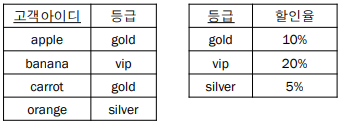

> 등급과 할인률은 함수종속관계.

`-` 보이스 코드 정규형(강한 제3정규형)

> 나머지 속성에 기본키(의 일부)가 함수적으로 종속되는 경우.

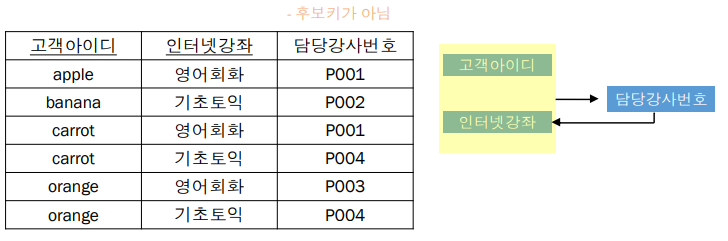

> 인터넷강좌에서 담당강사번호로의 함수 관계는 없다. (영어회화 -> P001, P003) 하지만 그 반대는 성립한다.

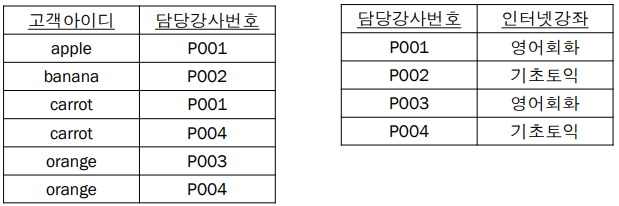

> 담당강사번호(X)를 기준으로 하여 분리하는 것이 합리적이다. 왜냐면 인터넷 강좌의 값은 담당강사번호를 하나만 불러올 수 없기 때문이다.

**결론**

삽입 / 갱신 / 삭제 이상 해소

함수종속관계 해소

제1정규형 : 속성의 원자성 확보

제2정규형

1. 속성들이 어떤 함수 관계로 구성되어 있는지 확인
2. 기본키 속성 확인

제3정규형

1. 분리한 릴레이션에서 기본키 이외의 속성에서의 함수종속 해소(이행적 함수종속)

보이스 / 코드 정규형

1. 기본키를 제외한 속성에서 기본키의 일부로의 함수종속 해소